In [2]:
import pandas as pd 
import torch 
import matplotlib.pyplot as plt
import numpy as np 
# !git clone https://github.com/PeterLarochkin/discrete_structures.git

#Определим сеть

In [3]:
from torch import nn
class Perceptron1(torch.nn.Module):
    def __init__(self, input_size=10, output_size=1):
        super(Perceptron1, self).__init__()
        self.fc1 = nn.Linear(input_size, 1000)
        self.act1 = nn.ReLU()
        self.fc2 = nn.Linear(1000, 500)
        self.act2 = nn.Sigmoid()
        self.fc3 = nn.Linear(500, 250)
        self.act3 = nn.Sigmoid()
        self.fc4 = nn.Linear(250, 125)
        self.act4 = nn.Sigmoid()
        self.fc5 = nn.Linear(125, output_size)
        self.act5 = nn.Sigmoid()
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act3(x)
        x = self.fc4(x)
        x = self.act4(x)
        x = self.fc5(x)
        x = self.act5(x)
        return x

class Perceptron2(torch.nn.Module):
    def __init__(self, input_size=10, output_size=1):
        super(Perceptron2, self).__init__()
        self.fc1 = nn.Linear(input_size, 1000)
        self.fc2 = nn.Linear(1000, 1500) 
        self.fc3 = nn.Linear(1500, 1000)
        self.fc4 = nn.Linear(1000, 500)
        self.fc5 = nn.Linear(500, 125) 
        self.fc6 = nn.Linear(125, output_size)
        self.act = nn.Sigmoid()
    def forward(self, x):
        x = self.fc1(x)
        x = self.act(x)
        x = self.fc2(x)
        x = self.act(x)
        x = self.fc3(x)
        x = self.act(x)
        x = self.fc4(x)
        x = self.act(x)
        x = self.fc5(x)
        x = self.act(x)
        x = self.fc6(x)
        x = self.act(x)
        return x

class LSTM(nn.Module):
    def __init__(self, input_size=10, hidden_layer_size=10, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size)) 

    def forward(self, input_seq):
        # self.hidden_cell = (torch.zeros(1, 1, self.hidden_layer_size), torch.zeros(1, 1, self.hidden_layer_size))
        
        item = input_seq.view(len(input_seq), 1, -1)
        
        lstm_out, hidden_out = self.lstm(item, self.hidden_cell)
        
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions.view(-1)
class LSTM1(nn.Module):
    def __init__(self, input_size=10, hidden_layer_size=10, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = Perceptron1(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size)) 

    def forward(self, input_seq):
        self.hidden_cell = (torch.zeros(1, 1, self.hidden_layer_size), 
                            torch.zeros(1, 1, self.hidden_layer_size))
        # print("input_seq size ", input_seq.size())
        item = input_seq.view(len(input_seq), 1, -1)
        # print("item size ", item.size())
        lstm_out, hidden_out = self.lstm(item, self.hidden_cell)
        # print("lstm_out size ", lstm_out.size())
        # print("hidden_cell size", self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions.view(-1)
class LSTM2(nn.Module):
    def __init__(self, input_size=10, hidden_layer_size=10, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = Perceptron2(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size)) 

    def forward(self, input_seq):
        self.hidden_cell = (torch.zeros(1, 1, self.hidden_layer_size), torch.zeros(1, 1, self.hidden_layer_size))
        # print("input_seq size ", input_seq.size())
        item = input_seq.view(len(input_seq), 1, -1)
        # print("item size ", item.size())
        lstm_out, hidden_out = self.lstm(item, self.hidden_cell)
        
        # print("lstm_out size ", lstm_out.size())
        # print("hidden_cell size", self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions.view(-1)

Обучение

In [4]:
import time
def generate_batch_data(device, x, y, batch_size):
    dataset = torch.utils.data.TensorDataset(x.to(device), y.to(device))
    loader = torch.utils.data.DataLoader(dataset=dataset, batch_size=batch_size, shuffle=False)

    for batch, [x_batch, y_batch] in enumerate(loader, 1):
        yield x_batch, y_batch, batch
def to_train(model, n_epochs, device, x_train, y_train, x_validatation, y_validatation, batch_size, loss_function, optimizer):
    train_losses = []
    validation_losses = []
    model.train()
    for epoch in range(n_epochs):
        start_time = time.time()

        train_loss = 0
        val_loss = 0
        batch = 0
        for x_batch, y_batch, batch in generate_batch_data(device, x_train, y_train, batch_size):    
            y_pred = model(x_batch)

            optimizer.zero_grad()
            
            loss = loss_function(y_pred, y_batch)
            loss.backward(retain_graph=True)
            optimizer.step()
            train_loss += loss.item()
        
        train_loss /= batch
        train_losses.append(train_loss)

        with torch.no_grad():
            for x_val_batch, y_val_batch, n in generate_batch_data(device, x_validatation, y_validatation, batch_size):
                val_loss += loss_function(model(x_val_batch), y_val_batch).item()
            val_loss /= n
            validation_losses.append(val_loss)
        elapsed = time.time() - start_time
        if True:
            print(f"Epoch {str(epoch + 1):>02}"
                    f" Train loss: {train_loss:.7f}."
                    f" Validation loss: {val_loss:.7f}."
                    f" Elapsed time: {elapsed:.2f}s.")
    plt.plot(range(len(train_losses)), train_losses, label="train_losses")
    plt.plot(range(len(validation_losses)), validation_losses, label="validation_losses")
    plt.legend(loc='upper center')
    plt.show()
    return model, train_losses, validation_losses

Сделаем предобработку

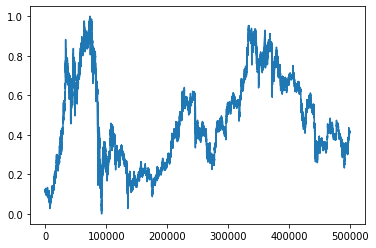

In [7]:
from sklearn.preprocessing import MinMaxScaler
time_series = list(map(float, eval(open('task1.txt', 'r').read())))
scaler = MinMaxScaler()
data = [(i, item) for i, item in enumerate(time_series)]
scaler.fit(data)
std_time_series = [ item for _, item in scaler.transform(data)]
plt.plot(std_time_series)
plt.show()

train = std_time_series[:int(len(std_time_series) * 0.95)]
valid = std_time_series[int(len(std_time_series) * 0.95): int(len(std_time_series) * 0.99)]
x_train = torch.from_numpy(np.array([train[i:i+10] for i in range(len(train) - 10)])).float()
x_validatation = torch.from_numpy(np.array([valid[i:i+10] for i in range(len(valid) - 10)])).float()
y_train = torch.FloatTensor(train[10:])
y_validatation = torch.FloatTensor(valid[10:])

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([60])) that is different to the input size (torch.Size([60, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([51])) that is different to the input size (torch.Size([51, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target

Epoch 01 Train loss: 0.0299489. Validation loss: 0.0429380. Elapsed time: 101.31s.
Epoch 02 Train loss: 0.0377275. Validation loss: 0.0434956. Elapsed time: 99.20s.
Epoch 03 Train loss: 0.0402021. Validation loss: 0.0441228. Elapsed time: 103.25s.
Epoch 04 Train loss: 0.0440405. Validation loss: 0.0464770. Elapsed time: 106.23s.
Epoch 05 Train loss: 0.0404923. Validation loss: 0.0434285. Elapsed time: 107.98s.
Epoch 06 Train loss: 0.0405189. Validation loss: 0.0452016. Elapsed time: 110.87s.
Epoch 07 Train loss: 0.0436533. Validation loss: 0.0458652. Elapsed time: 114.26s.
Epoch 08 Train loss: 0.0413219. Validation loss: 0.0477338. Elapsed time: 117.82s.
Epoch 09 Train loss: 0.0472523. Validation loss: 0.0474189. Elapsed time: 145.07s.
Epoch 10 Train loss: 0.0454865. Validation loss: 0.0518400. Elapsed time: 151.00s.


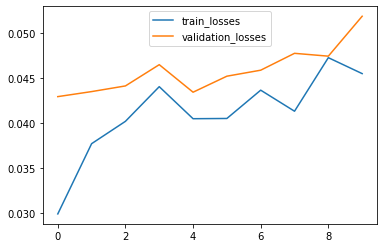

Epoch 01 Train loss: 0.0308679. Validation loss: 0.0431340. Elapsed time: 317.78s.
Epoch 02 Train loss: 0.0403839. Validation loss: 0.0440072. Elapsed time: 314.47s.
Epoch 03 Train loss: 0.0406782. Validation loss: 0.0433901. Elapsed time: 308.90s.
Epoch 04 Train loss: 0.0414283. Validation loss: 0.0432594. Elapsed time: 309.95s.
Epoch 05 Train loss: 0.0411709. Validation loss: 0.0433942. Elapsed time: 307.90s.
Epoch 06 Train loss: 0.0417939. Validation loss: 0.0434246. Elapsed time: 309.10s.
Epoch 07 Train loss: 0.0423515. Validation loss: 0.0434625. Elapsed time: 308.44s.
Epoch 08 Train loss: 0.0413468. Validation loss: 0.0432875. Elapsed time: 306.96s.
Epoch 09 Train loss: 0.0412439. Validation loss: 0.0432117. Elapsed time: 305.73s.
Epoch 10 Train loss: 0.0416647. Validation loss: 0.0432580. Elapsed time: 305.97s.


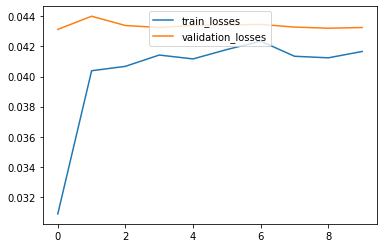

Epoch 01 Train loss: 0.0231885. Validation loss: 0.0147055. Elapsed time: 79.80s.
Epoch 02 Train loss: 0.0087613. Validation loss: 0.0106554. Elapsed time: 81.49s.
Epoch 03 Train loss: 0.0059316. Validation loss: 0.0074856. Elapsed time: 79.95s.
Epoch 04 Train loss: 0.0045495. Validation loss: 0.0056282. Elapsed time: 78.38s.
Epoch 05 Train loss: 0.0042095. Validation loss: 0.0048736. Elapsed time: 78.30s.
Epoch 06 Train loss: 0.0040909. Validation loss: 0.0046448. Elapsed time: 79.70s.
Epoch 07 Train loss: 0.0039909. Validation loss: 0.0044280. Elapsed time: 79.10s.
Epoch 08 Train loss: 0.0039059. Validation loss: 0.0043068. Elapsed time: 78.79s.
Epoch 09 Train loss: 0.0038320. Validation loss: 0.0041728. Elapsed time: 79.42s.
Epoch 10 Train loss: 0.0037848. Validation loss: 0.0040210. Elapsed time: 80.16s.


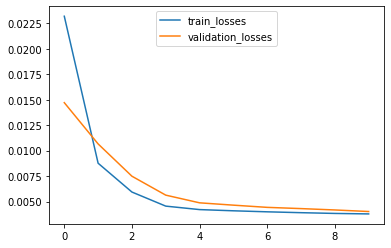

Epoch 01 Train loss: 0.0336261. Validation loss: 0.0452648. Elapsed time: 172.25s.
Epoch 02 Train loss: 0.0430058. Validation loss: 0.0445115. Elapsed time: 180.24s.
Epoch 03 Train loss: 0.0471096. Validation loss: 0.0412240. Elapsed time: 180.24s.
Epoch 04 Train loss: 0.0417840. Validation loss: 0.0449076. Elapsed time: 181.82s.
Epoch 05 Train loss: 0.0372710. Validation loss: 0.0460224. Elapsed time: 183.73s.
Epoch 06 Train loss: 0.0324471. Validation loss: 0.0410128. Elapsed time: 187.77s.
Epoch 07 Train loss: 0.0320751. Validation loss: 0.0309153. Elapsed time: 190.67s.
Epoch 08 Train loss: 0.0227153. Validation loss: 0.0273045. Elapsed time: 195.30s.
Epoch 09 Train loss: 0.0126944. Validation loss: 0.0216924. Elapsed time: 199.59s.
Epoch 10 Train loss: 0.0107626. Validation loss: 0.0206502. Elapsed time: 203.22s.


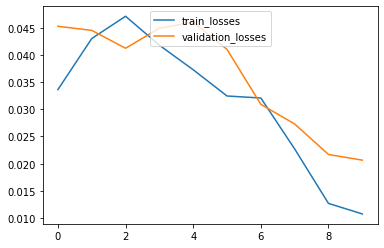

Epoch 01 Train loss: 0.0321859. Validation loss: 0.0437855. Elapsed time: 394.45s.
Epoch 02 Train loss: 0.0412287. Validation loss: 0.0434415. Elapsed time: 389.04s.
Epoch 03 Train loss: 0.0391367. Validation loss: 0.0433545. Elapsed time: 424.72s.
Epoch 04 Train loss: 0.0414827. Validation loss: 0.0432958. Elapsed time: 466.45s.
Epoch 05 Train loss: 0.0412621. Validation loss: 0.0432305. Elapsed time: 460.53s.
Epoch 06 Train loss: 0.0411162. Validation loss: 0.0432966. Elapsed time: 433.90s.
Epoch 07 Train loss: 0.0421430. Validation loss: 0.0432318. Elapsed time: 422.55s.
Epoch 08 Train loss: 0.0416437. Validation loss: 0.0432483. Elapsed time: 385.34s.
Epoch 09 Train loss: 0.0429247. Validation loss: 0.0433838. Elapsed time: 386.36s.
Epoch 10 Train loss: 0.0436144. Validation loss: 0.0433042. Elapsed time: 389.70s.


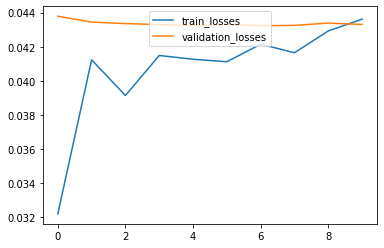

In [10]:
MODELS = [Perceptron1(), Perceptron2(), LSTM(10,10,1), LSTM1(10,10,1), LSTM2(10,10,1)]
# models = [LSTM2(10,10,1)]
done_models = []
for model in MODELS:
    # model = LSTM(10,10,1)
    device = torch.device('cpu')
    batch_size= 100
    n_epochs= 10
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0003)
    loss_function = torch.nn.L1Loss()
    done_model1, train_loss1, val_loss1 = to_train(model, n_epochs, device, x_train, y_train, x_validatation, y_validatation, batch_size, loss_function, optimizer)
    done_model1.eval()
    done_models.append(done_model1)
    torch.save(done_model1.state_dict(), "discrete_structures/HM1/models/{}".format(type(done_model1)))

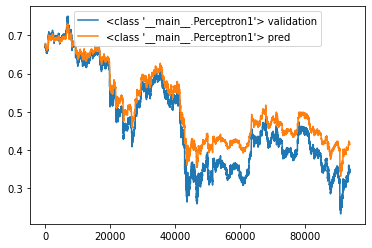

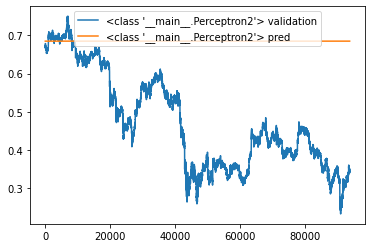

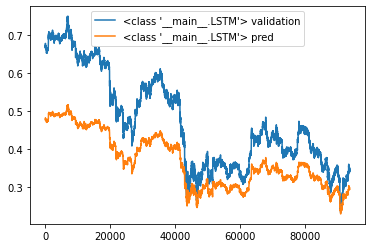

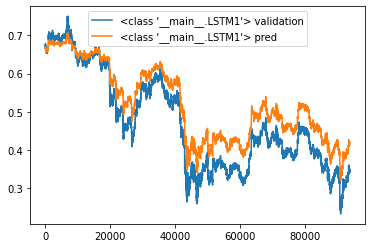

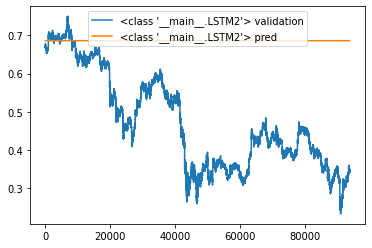

In [ ]:
# print(x_validatation[0])
def show_predict(done_model):
    with torch.no_grad():
        pred_1 = list(map(lambda item: done_model(item.view(1, 1, 10)).item(), x_validatation ))
        pred_all = list(x_validatation[0])
        for i in range(len(y_validatation)):
            pred_all.append(done_model(torch.FloatTensor(pred_all[i:i+10]).view(1, 1, 10)).item())
        ratio = 0.99
        plt.plot(range(len(y_validatation[:int(len(y_validatation)*ratio)])), y_validatation[:int(len(y_validatation)*ratio)], label="{} validation".format(type(done_model)))
        plt.plot(range(len(pred_1[:int(len(pred_1)*ratio)])), pred_1[:int(len(pred_1)*ratio)], label="{} pred".format(type(done_model)))
        # plt.plot(range(len(pred_all[:int(len(pred_all)*ratio)])), pred_all[:int(len(pred_all)*ratio)], label="pred all")
        plt.legend(loc='upper center')
        plt.show()
for done_model in done_models:
    show_predict(done_model)

## Простая система принятия решения

In [15]:
# true  buy
# false sell
import random
def default_predictor(*args):
  return random.random()

def get_recomendation(scaller, sequence_of_smth, predictor=default_predictor, initial_money=100):
  old_decision = False
  current_money = initial_money
  current_asset_quantity = 0.0
  seq_for_model = [sequence_of_smth[i:i+10] 
                   for i in range(len(sequence_of_smth) - 10)]
  true_values = sequence_of_smth[10:]
  values = []
  for i in range(len(seq_for_model)):
    # print(old_decision)
    if type(predictor) == LSTM or type(predictor) == LSTM1 or type(predictor) == LSTM2:
      item = torch.from_numpy(np.array([seq_for_model[i]])).float()
    else:
      item = torch.from_numpy(np.array(seq_for_model[i])).float()
    value = true_values[i]
    
    if type(predictor) == LSTM or type(predictor) == LSTM1 or type(predictor) == LSTM2:
      new_value = (scaller.inverse_transform([(0, float(predictor(item)[0]))]))[0][1]
      item = (scaller.inverse_transform([(0, float(item[0][-1].item()))]))[0][1]
    else:
      new_value = (scaller.inverse_transform([(0, float(predictor(item)))]))[0][1]
      item = (scaller.inverse_transform([(0, float(item[-1].item()))]))[0][1]
    
    
    # values.append(new_value)
    # print(item)
    # break
    new_decision = new_value >= item
    
    if i == len(seq_for_model) - 1:
        # plt.plot(range(len(values)), values)
        # plt.show()
        if current_money != 0.0:
          print("from {} you make {}".format(initial_money, current_money))
          return current_money
        else:
          current_money = value * current_asset_quantity
          current_asset_quantity = 0.0
          print("from {} you make {}".format(initial_money, current_money))
          return current_money
    
    if new_decision != old_decision:
      if new_decision:
        current_asset_quantity = current_money/value
        current_money = 0.0
      else:
        current_money = value * current_asset_quantity
        current_asset_quantity = 0.0
    old_decision = new_decision
# MODELS = [Perceptron1(), Perceptron2(), LSTM(10,10,1), LSTM1(10,10,1), LSTM2(10,10,1), default_predictor]
MODELS = [default_predictor]
for predictor in MODELS:
  if (predictor)!= default_predictor:
    predictor.load_state_dict(torch.load("models/{}".format(type(predictor))))
  print(type(predictor))
  if (predictor)!= default_predictor:
    predictor.eval()
  get_recomendation(scaler,valid,predictor=predictor)



<class '__main__.Perceptron1'>
from 100 you make 87.84854619677175
<class '__main__.Perceptron2'>
from 100 you make 101.98284276766147
<class '__main__.LSTM'>


RuntimeError: input.size(-1) must be equal to input_size. Expected 10, got 1